# **Applied Statistics: Tasks**

***

This notebook contains code and resources for my tasks from the Applied Statistics module. 

**Author: Brianne McGrath**

***

## **Task One: Permutations and Combinations - Lady Tasting Tea Experiment**

___

### **Overview:**

In this task, we calculate probabilities in a modified "Lady Tasting Tea" experiment. We examine the likelihood of a participant correctly identifying cups with milk poured first by guessing, focusing on outcomes for exactly six and at least five correct cups.


In [42]:
# import necessary library
import itertools

### **Step One: Define the Cups**

Creating a sequence where the first six cups are milk first, and the last six are tea first. 


In [43]:
# define the cups - first six are milk first, last six are tea first
cups = ['milk'] * 6 + ['tea'] * 6

### **Step Two: Generate Combinations**

Generating all possible combinations of selecting six cups from the twelve available cups. Combinations are stored in `all_combinations`.


In [44]:
# generate all combinations of six cups from twelve
all_combinations = list(itertools.combinations(cups, 6))

### **Step Three: Counting Outcomes**
Counting the number of outcomes where the lady identifies exactly six correct cups and at least five correct cups. These values are stored as `count_6` and `count_at_least_5`, respectively. 


In [72]:
# count outcomes for exactly six and at least five correct cups
count_6 = sum(comb.count('milk') == 6 for comb in all_combinations)
count_at_least_5 = sum(comb.count('milk') >= 5 for comb in all_combinations)

### **Step Four: Calculate Probabilties & Display Results**

Determine probabilies for exactly six correct and at least five correct cups - print results.

In [73]:
# calculate probabilities
total_outcomes = len(all_combinations)
prob_6_correct = count_6 / total_outcomes
prob_at_least_5 = count_at_least_5 / total_outcomes

# print results
print(f"Total Combinations: {total_outcomes}")
print(f"Probability of Exactly Six Correct Cups: {prob_6_correct:.6f}")
print(f"Probability of At Least Five Correct Cups: {prob_at_least_5:.6f}")

Total Combinations: 924
Probability of Exactly Six Correct Cups: 0.001082
Probability of At Least Five Correct Cups: 0.040043


### **Would We Accept Two Errors?** 

In [74]:
# count outcomes for exactly at four correct cups - accepting two errors. 
count_at_least_4 = sum(comb.count('milk') >= 4 for comb in all_combinations)
prob_at_least_4 = count_at_least_4 / total_outcomes
print(f"Probability of At Least Four Correct Cups: {prob_at_least_4:.6f}")

Probability of At Least Four Correct Cups: 0.283550


I believe we should not accept two errors in this experiement due to the significant increase in the probability of achieving at least 4 cups correctly **(0.283550)**. This higher probability compared to **5** **(0.040043)** or **6** **(0.001082)** correctly implies that participants could pass by guessing rather than demonstrating true distinction between the two options. 

While allowing two errors may acknowledge indivual variability, it ultimately undermines the test's integrity. The greater likelihood of passing without genuine skill compromises the experiement's goal of accurately assessing participants' abilities. A stricter threshold is necessary, in my opinion, to ensure that only those who can truly differentiate between the cups are recognised, perserving the integrity of the experiement. 

___

## **Task Two: numpy's Normal Distribution**

___

### **Overview:**
This task evaluates whether a sample generated by `numpy.random.normal()` resembles a true normal distribution using the Shapiro-Wilk test and a histogram with a PDF overlay.


In [75]:
# import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### **Step One: Generate a Sample**

Generating 100,00 values from a normal distribution with a mean of 10.0 and a standard deviation of 3.0, 

In [48]:
# setting mean and standard deviation
mean = 10.0
std_dev = 3.6
sample_size = 100000 # number of values to generate

# generate sample 
sample = np.random.normal(loc=mean, scale=std_dev, size=sample_size)

### **Step Two: Shapiro-Wilk Test for Normality**

The Shapiro-Wilk test checks if a sample comes from a normal distribution. We will apply it to our generated sample.


In [49]:
shapiro_test = stats.shapiro(sample[:5000])  # limit to 5000 values due to test limitations

# print results
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

Shapiro-Wilk Test Statistic: 0.9993871450424194, p-value: 0.09165263921022415


** Interpretation of Results

### **Step 4: Plot Histogram**

Creating a histogram of our sample and plotting the normal distribution probabability density.

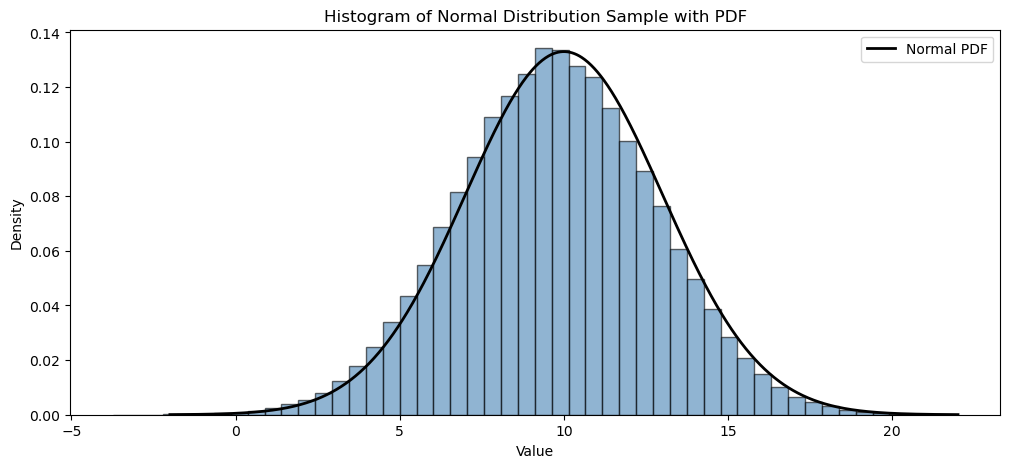

In [77]:
# count occurrences in each bin
counts, bin_edges = np.histogram(sample, bins=50, density=True)

# setting up plot
fig, ax = plt.subplots(figsize=(12, 5))

# create a bar chart from the histogram data
ax.bar(bin_edges[:-1], counts, width=bin_edges[1] - bin_edges[0], color='steelblue', edgecolor='black', alpha=0.6)

# generate x values for the normal PDF overlay
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
pdf = stats.norm.pdf(x, loc=mean, scale=std_dev)

# overlay the normal PDF
ax.plot(x, pdf, 'k-', linewidth=2, label='Normal PDF')
ax.set_title(f'Histogram of Normal Distribution Sample with PDF')
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.legend()

plt.show()


## **References:**

- https://docs.python.org/3/library/itertools.html (Task One - Itertools for Combinations)
- https://builtin.com/data-science/shapiro-wilk-test#:~:text=Shapiro%2DWilk%20Test%3F-,The%20Shapiro%2DWilk%20test%20is%20a%20hypothesis%20test%20that%20is,generated%20from%20a%20normal%20distribution. (Task Two - Shapiro-Wilk Test for Normality)
- https://stackoverflow.com/questions/28217306/error-in-shapiro-test-sample-size-must-be-between (Task Two - Shapiro-Wilk Test Limitations)
- https://stackoverflow.com/questions/52423635/how-to-plot-normalized-histogram-with-pdf-properly-using-matplotlib (Task Two - Histogram & Normal PDF)